In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## first we need to convert it into one hot encoding

In [3]:
# for one hot encoding of pandas dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## Create X and y values (features and labels)

In [4]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)        # doubt = what is with axis
y = insurance_one_hot["charges"]

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split                         # it randomly shuffles and splits data random state 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)      # test_size  = test data size
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
tf.random.set_seed(42)

# 1 create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)

])

# 2 compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3 fit the model
insurance_model.fit(X_train,y_train, epochs = 100  , verbose = 0 )

In [9]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [10]:
y_pred = insurance_model.predict(X_test)

mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=7023.329>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111577850.0>)

In [11]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels = y_test,
                    predictions =y_pred):
  # set figure size
  plt.figure(figsize=(10,7))
  
  # plot training data in blue
  plt.scatter(train_data, train_labels, c ="b",label = "training data")

  # plot testing data in green
  plt.scatter(test_data, test_labels, c = "g" , label = "testing data")

  # plot model's predictions in red
  plt.scatter(test_data, predictions ,c = "r",label = "predictions")

  # show legends
  plt.legend()

In [12]:
#plot_predictions(predictions = y_pred)

In [13]:
y_train.median(), y_train.mean()     

(9575.4421, 13346.089736364485)

## Improvising the model

In [14]:
# adding extra layer

tf.random.set_seed(42)

# 1 create a model
insurance_model_2 = tf.keras.Sequential([
#tf.keras.layers.Dense(100),                      # doesnot works properly
                                         
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)

])

# 2 compile the model
insurance_model_2.compile( loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

# 3 fit the model
insurance_model_2.fit(X_train,y_train, epochs = 100, verbose = 0 )

In [15]:
# adding extra layer and trying adam optimizer

tf.random.set_seed(42)

# 1 create a model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),          
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)

])

# 2 compile the model
insurance_model_2.compile( loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3 fit the model
insurance_model_2.fit(X_train,y_train, epochs = 100, verbose = 0 )

In [16]:
insurance_model.evaluate(X_test,y_test) , insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 8ms/step - loss: 4924.3477 - mae: 4924.3477


([7023.3291015625, 7023.3291015625], [4924.34765625, 4924.34765625])

In [17]:
# increasing epochs
# Set random seed
tf.random.set_seed(42)

# 1 create a model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2 compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3 fit the model
history  =  insurance_model_3.fit(X_train,y_train, epochs = 300 , verbose = 0 )

In [18]:
# evaluate the model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


[3215.86083984375, 3215.86083984375]

Text(0.5, 0, 'epochs')

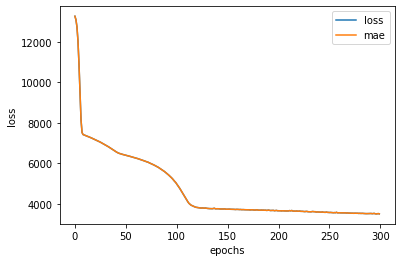

In [19]:
# plot history ( also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)

NN prefers to normalization

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

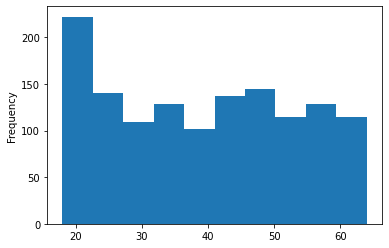

In [21]:
X["age"].plot(kind = "hist")

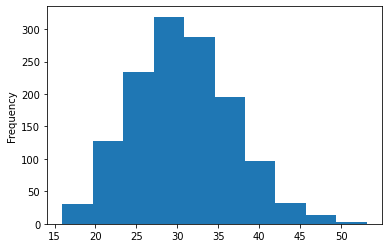

In [22]:
X["bmi"].plot(kind= "hist")

In [23]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])          # convert values in these columns between 0 and 1
)

# create X and y value
X = insurance.drop("charges",axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train,X_test, y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [32]:
# set random seed 
tf.random.set_seed(42)

# 1 create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2 compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3 fit the model
insurance_model_4.fit(X_train_normal,y_train, epochs = 200 , verbose = 1 )

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.9980 - mae: 13344.9980
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13338.8926 - mae: 13338.8926
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13315.4805 - mae: 13315.4805
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13242.6367 - mae: 13242.6367
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13063.9229 - mae: 13063.9229
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12696.6035 - mae: 12696.6035
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12035.5264 - mae: 12035.5264
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 11041.0479 - mae: 11041.0479
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 9909.0566 - mae: 9909.0566
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8878.6738 

In [33]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.2612 - mae: 3175.2612


[3175.26123046875, 3175.26123046875]